# Usage Analysis

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

Setting `matplotlib` parameters

In [3]:
plt.rcParams["figure.figsize"] = [12, 6]

Read the data and transform the `timestamp` variable

In [4]:
df = pd.read_csv("package_download.csv", parse_dates=["timestamp"])

Aggregating number of daily downloads with moving average (3 days)

In [5]:
source = (
    df.assign(num=1)
    .groupby(pd.Grouper(key="timestamp", freq="1D"))["num"]
    .count()
    .rolling(window=3)
    .mean()
    .dropna()
)

Creating a list from the release dates

In [6]:
release_dates = df.groupby("package_version")["timestamp"].min()

As we can see there is only a slight increase in downloads after the releases

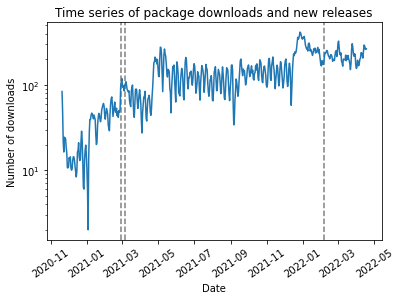

In [7]:
fig, axes = plt.subplots()
df.groupby("package_version")["timestamp"].min().iloc[1:].apply(
    lambda x: axes.axvline(x, linestyle="--", color="gray")
)
axes.plot(source.index, source)
axes.set_yscale("log")

plt.title("Time series of package downloads and new releases")
plt.xlabel("Date")
plt.xticks(rotation = 35)
plt.ylabel("Number of downloads")
plt.show()

-------

Aggregating number of daily downloads by system names with moving average (30 days)

In [8]:
source = (
    df.assign(num=1)
    .groupby(
        [
            pd.Grouper(key = 'timestamp', freq='1D'),
            "sys_name",
        ]
    )["num"]
    .count()
    .groupby(level=1)
    .apply(lambda gs: gs.rolling(window=30).mean())
    .dropna()
)

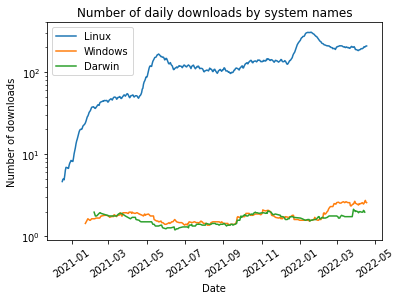

In [9]:
fig, axes = plt.subplots()
for cat in source.index.get_level_values(1).unique():
    axes.plot(source[:, cat].index, source[:, cat], label=cat)
axes.legend()
axes.set_yscale('log')
plt.title("Number of daily downloads by system names")
plt.xlabel("Date")
plt.xticks(rotation = 35)
plt.ylabel("Number of downloads")
plt.show()

Creating a pivot table of the co-occurrences of operating systems and cpu types

In [10]:
(
    df[["cpu", "sys_name"]]
    .assign(num=1)
    .groupby(["cpu", "sys_name"], as_index=False)
    .count()
    .assign(num = lambda _df: _df['num'] / _df['num'].sum())
    .pivot("sys_name", "cpu", "num")
    .fillna(0)
    .style.format("{:.2%}")
    .background_gradient(cmap='viridis')
    .set_caption("Co-occurrences of operating systems and cpu types")
)

cpu,AMD64,aarch64,arm64,armv7l,x86_64
sys_name,,,,,
Darwin,0.00%,0.00%,0.07%,0.00%,0.52%
Linux,0.00%,0.02%,0.00%,0.01%,98.56%
Windows,0.82%,0.00%,0.00%,0.00%,0.00%


--------

Aggregating number of daily downloads by releases with moving average (15 days)

In [57]:
source = (
    df.assign(num=1)
    .groupby(
        [
            pd.Grouper(key="timestamp", freq="1D"),
            "package_version",
        ]
    )["num"]
    .count()
    .groupby(level=1)
    .apply(lambda gs: gs.rolling(window=15).mean())
    .dropna()
)

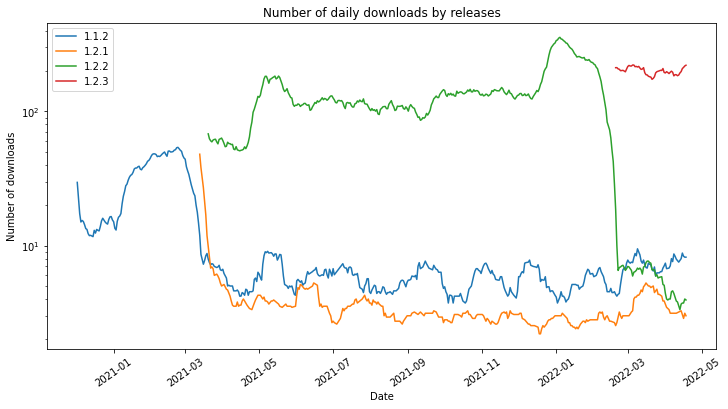

In [58]:
fig, axes = plt.subplots()
for cat in source.index.get_level_values(1).unique():
    axes.plot(source[:, cat].index, source[:, cat], label=cat)
axes.legend()
axes.set_yscale('log')
plt.title("Number of daily downloads by releases")
plt.xlabel("Date")
plt.xticks(rotation = 35)
plt.ylabel("Number of downloads")
plt.show()

-----

Cumulating number of daily downloads by system names with moving average (30 days)

In [59]:
source = (
    df.assign(num=1)
    .groupby(
        [
            pd.Grouper(key = 'timestamp', freq='1D'),
            "package_version",
        ]
    )["num"]
    .count()
    .groupby(level=1)
    .apply(lambda gs: gs.cumsum())
)

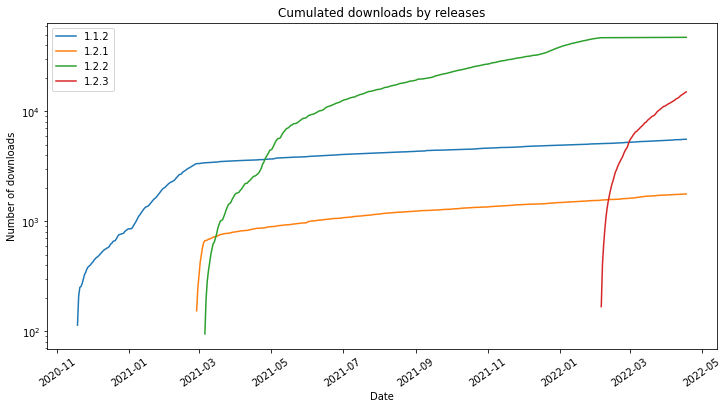

In [60]:
fig, axes = plt.subplots()
for cat in source.index.get_level_values(1).unique():
    axes.plot(source[:, cat].index, source[:, cat], label=cat)
axes.legend()
axes.set_yscale('log')
plt.title("Cumulated downloads by releases")
plt.xlabel("Date")
plt.xticks(rotation = 35)
plt.ylabel("Number of downloads")
plt.show()